# Serialization data load and latency

examination of following (simple) methods:
- integrated (json, pickle)
- superjson (with compress and not)
- protobuf
- gzip (with json, pickle, protobuf)
- asn1 (with json, pickle)


In [1]:
from serialization.in_memory_test import *

save_plot = False

In [2]:
# make a single serialize & compress test with all implemented methods
number_of_frames = 10
method_list = [
    RawJson(number_of_frames),
    RawPickle(number_of_frames),
    RawSJson(number_of_frames),
    RawProtob(number_of_frames),
    CompressedSJson(number_of_frames),
    GzipJson(number_of_frames),
    GzipPkl(number_of_frames),
    GzipProtob(number_of_frames),
    Asn1Json(number_of_frames),
    Asn1Pkl(number_of_frames)
]

for method in method_list:
    method.print()

raw_json        	 raw_size:       0.179688 kB 	 serialized:           1.594727 kB in   0.00000000 sec 	 deserialized:       0.179688 kB in   0.00000000 sec
raw_pickle      	 raw_size:       0.179688 kB 	 serialized:           0.525391 kB in   0.00000000 sec 	 deserialized:       0.148438 kB in   0.00000000 sec
raw_sjson       	 raw_size:       0.179688 kB 	 serialized:           1.594727 kB in   0.00000000 sec 	 deserialized:       0.179688 kB in   0.00101924 sec
raw_protob      	 raw_size:       0.179688 kB 	 serialized:           0.725586 kB in   0.00000000 sec 	 deserialized:       0.179688 kB in   0.00108480 sec
zip_sjson       	 raw_size:       0.179688 kB 	 serialized:           0.227539 kB in   0.00000000 sec 	 deserialized:       0.179688 kB in   0.00000000 sec
gzip_json       	 raw_size:       0.179688 kB 	 serialized:           0.190430 kB in   0.00000000 sec 	 deserialized:       0.179688 kB in   0.00000000 sec
gzip_pkl        	 raw_size:       0.179688 kB 	 serialized:     

In [3]:
# check the deserialized with raw_data
raw_pkl = method_list[1]
raw_pkl.check_data()

True

In [4]:
number_of_frames = 10000
method_list = [
    RawJson(number_of_frames),
    RawPickle(number_of_frames),
    RawSJson(number_of_frames),
    RawProtob(number_of_frames),
    CompressedSJson(number_of_frames),
    GzipJson(number_of_frames),
    GzipPkl(number_of_frames),
    GzipProtob(number_of_frames),
    Asn1Json(number_of_frames),
    Asn1Pkl(number_of_frames)
]

for method in method_list:
    method.print()

raw_json        	 raw_size:      83.179688 kB 	 serialized:        1559.597656 kB in   0.02036023 sec 	 deserialized:      83.179688 kB in   0.01454473 sec
raw_pickle      	 raw_size:      83.179688 kB 	 serialized:         381.065430 kB in   0.00208306 sec 	 deserialized:      87.992188 kB in   0.00324464 sec
raw_sjson       	 raw_size:      83.179688 kB 	 serialized:        1558.661133 kB in   0.08871555 sec 	 deserialized:      83.179688 kB in   0.01334167 sec
raw_protob      	 raw_size:      83.179688 kB 	 serialized:         693.391602 kB in   0.09978247 sec 	 deserialized:      83.179688 kB in   0.47226000 sec
zip_sjson       	 raw_size:      83.179688 kB 	 serialized:           8.493164 kB in   0.09847379 sec 	 deserialized:      83.179688 kB in   0.01507115 sec
gzip_json       	 raw_size:      83.179688 kB 	 serialized:           6.356445 kB in   0.02441168 sec 	 deserialized:      83.179688 kB in   0.01416063 sec
gzip_pkl        	 raw_size:      83.179688 kB 	 serialized:     

In [5]:
# Nutzdatenberechnung
datenrate = 500 * 10**3
buslast = 0.9
nutzdaten = 8 * 8
brutto_daten_min = 110
brutto_daten_max = 153

frames_pro_sec_min = datenrate/brutto_daten_max*buslast
frames_pro_sec_max = datenrate/brutto_daten_min*buslast

print('frames pro sec min: {}'. format(frames_pro_sec_min))
print('frames pro sec max: {}'.format(frames_pro_sec_max))

frames pro sec min: 2941.176470588235
frames pro sec max: 4090.9090909090905


In [6]:
calc_serialization_times(1)  # for 1 sec

raw_data_size [kB]  time_2_gen_data [ms]  \
test_time [s] method                                                  
1             raw_pickle            32.273438              9.582043   
              raw_json              32.273438              7.590294   
              raw_sjson             32.273438              8.937836   
              raw_protob            32.273438            287.247419   
              zip_sjson             32.273438              7.972956   
              gzip_json             32.273438              9.430885   
              gzip_pkl              32.273438              9.045124   
              gzip_protob           32.273438             39.577961   
              asn1_json             32.273438              7.996798   
              asn1_pkl              32.273438              7.996082   

                           serialized_data_size [kB]  time_2_serialize [ms]  \
test_time [s] method                                                          
1             raw_pickle                  155.941406               0.999212   
              raw_json                    638.403320               9.370089   
              raw_sjson                   637.626953              41.849375   
              raw_protob                  283.616211              44.217348   
              zip_sjson                     3.618164              39.832830   
              gzip_json                     2.734375              10.001421   
              gzip_pkl                      0.789062               0.950098   
              gzip_protob                   1.102539              48.017025   
              asn1_json                   638.043945               7.002592   
              asn1_pkl                    155.946289               0.999212   

                           deserialized_data_size [kB]  \
test_time [s] method                                     
1             raw_pickle                     36.023438   
              raw_json                       32.273438   
              raw_sjson                      32.273438   
              raw_protob                     32.273438   
              zip_sjson                      32.273438   
              gzip_json                      32.273438   
              gzip_pkl                       36.023438   
              gzip_protob                    32.273438   
              asn1_json                      32.273438   
              asn1_pkl                       36.023438   

                           time_2_deserialize [ms]  number_of_frames  
test_time [s] method                                                  
1             raw_pickle                  2.218008              4090  
              raw_json                    5.087614              4090  
              raw_sjson                   6.006002              4090  
              raw_protob                145.499468              4090  
              zip_sjson                   6.006241              4090  
              gzip_json                   6.104708              4090  
              gzip_pkl                    2.292633              4090  
              gzip_protob               443.944931              4090  
              asn1_json                   6.001234              4090  
              asn1_pkl                    1.001120              4090

In [7]:
calc_serialization_times(0.1)  # for 0.1 sec

raw_data_size [kB]  time_2_gen_data [ms]  \
test_time [s] method                                                  
0.1           raw_pickle             3.617188              1.977921   
              raw_json               3.617188              0.000000   
              raw_sjson              3.617188              0.579357   
              raw_protob             3.617188              4.507780   
              zip_sjson              3.617188              1.000404   
              gzip_json              3.617188              2.000093   
              gzip_pkl               3.617188              1.000166   
              gzip_protob            3.617188              5.190849   
              asn1_json              3.617188              1.050711   
              asn1_pkl               3.617188              1.007795   

                           serialized_data_size [kB]  time_2_serialize [ms]  \
test_time [s] method                                                          
0.1           raw_pickle                   15.721680               0.000000   
              raw_json                     63.938477               1.001835   
              raw_sjson                    63.765625               4.451990   
              raw_protob                   28.390625               4.671097   
              zip_sjson                     0.579102               6.128550   
              gzip_json                     0.458984               0.999928   
              gzip_pkl                      0.300781               0.998735   
              gzip_protob                   0.237305               6.088972   
              asn1_json                    63.942383               0.000000   
              asn1_pkl                     15.725586               0.000000   

                           deserialized_data_size [kB]  \
test_time [s] method                                     
0.1           raw_pickle                      3.273438   
              raw_json                        3.617188   
              raw_sjson                       3.617188   
              raw_protob                      3.617188   
              zip_sjson                       3.617188   
              gzip_json                       3.617188   
              gzip_pkl                        3.273438   
              gzip_protob                     3.617188   
              asn1_json                       3.617188   
              asn1_pkl                        3.273438   

                           time_2_deserialize [ms]  number_of_frames  
test_time [s] method                                                  
0.1           raw_pickle                  0.468493               409  
              raw_json                    0.999451               409  
              raw_sjson                   0.000000               409  
              raw_protob                 14.859676               409  
              zip_sjson                   0.999928               409  
              gzip_json                   0.999928               409  
              gzip_pkl                    0.000000               409  
              gzip_protob                14.572382               409  
              asn1_json                   1.027107               409  
              asn1_pkl                    0.000000               409

In [8]:
calc_serialization_times(1/4090).loc[:,['raw_pickle','gzip_pkl'],:]

raw_data_size [kB]  time_2_gen_data [ms]  \
test_time [s] method                                                 
0.000244      raw_pickle            0.085938                   0.0   
              gzip_pkl              0.085938                   0.0   

                          serialized_data_size [kB]  time_2_serialize [ms]  \
test_time [s] method                                                         
0.000244      raw_pickle                   0.181641                    0.0   
              gzip_pkl                     0.184570                    0.0   

                          deserialized_data_size [kB]  \
test_time [s] method                                    
0.000244      raw_pickle                     0.085938   
              gzip_pkl                       0.085938   

                          time_2_deserialize [ms]  number_of_frames  
test_time [s] method                                                 
0.000244      raw_pickle                      0.0                 1  
              gzip_pkl                        0.0                 1

In [9]:
# calc times for various measurement times over loops and calc the mean
result = do_test(2, 0.5)  # test without loops
result = do_test2(2, 0.5, 3)
#save_data(result)
result

raw_data_size [kB]  time_2_gen_data [ms]  \
test_time [s] method                                                  
0.0           asn1_json              0.054688              0.000000   
              asn1_pkl               0.054688              0.000000   
              gzip_json              0.054688              0.000000   
              gzip_pkl               0.054688              0.000000   
              gzip_protob            0.054688              0.000000   
              raw_json               0.054688              0.000000   
              raw_pickle             0.054688              0.000000   
              raw_protob             0.054688              0.000000   
              raw_sjson              0.054688              0.000000   
              zip_sjson              0.054688              0.000000   
0.5           asn1_json             17.804688              4.051844   
              asn1_pkl              17.804688              3.770034   
              gzip_json             17.804688              4.031261   
              gzip_pkl              17.804688              4.098097   
              gzip_protob           17.804688             18.206835   
              raw_json              17.804688              3.797611   
              raw_pickle            17.804688              3.881454   
              raw_protob            17.804688             18.812497   
              raw_sjson             17.804688              3.716389   
              zip_sjson             17.804688              3.386259   
1.0           asn1_json             32.273438              8.083582   
              asn1_pkl              32.273438              7.647117   
              gzip_json             32.273438              7.486979   
              gzip_pkl              32.273438              7.192294   
              gzip_protob           32.273438            112.347921   
              raw_json              32.273438              7.033189   
              raw_pickle            32.273438              6.976287   
              raw_protob            32.273438             35.619179   
              raw_sjson             32.273438              7.092635   
              zip_sjson             32.273438              7.085880   
1.5           asn1_json             51.835938             11.022886   
              asn1_pkl              51.835938             11.261861   
              gzip_json             51.835938             10.645151   
              gzip_pkl              51.835938             11.489550   
              gzip_protob           51.835938            132.841269   
              raw_json              51.835938             10.722081   
              raw_pickle            51.835938             11.300564   
              raw_protob            51.835938            121.408463   
              raw_sjson             51.835938              9.941498   
              zip_sjson             51.835938             10.932763   

                           serialized_data_size [kB]  time_2_serialize [ms]  \
test_time [s] method                                                          
0.0           asn1_json                     0.036133               0.000000   
              asn1_pkl                      0.039062               0.000000   
              gzip_json                     0.053711               0.000000   
              gzip_pkl                      0.056641               0.000000   
              gzip_protob                   0.051758               0.000000   
              raw_json                      0.034180               0.000000   
              raw_pickle                    0.037109               0.000000   
              raw_protob                    0.032227               0.000000   
              raw_sjson                     0.034180               0.000000   
              zip_sjson                     0.047852               0.000000   
0.5           asn1_json                   319.287109               2.821366   
              asn

In [10]:
# sort the dataframe with multiindex
result.reset_index().pivot(index='test_time [s]', columns='method')

raw_data_size [kB]                                               \
method                 asn1_json   asn1_pkl  gzip_json   gzip_pkl gzip_protob   
test_time [s]                                                                   
0.0                     0.054688   0.054688   0.054688   0.054688    0.054688   
0.5                    17.804688  17.804688  17.804688  17.804688   17.804688   
1.0                    32.273438  32.273438  32.273438  32.273438   32.273438   
1.5                    51.835938  51.835938  51.835938  51.835938   51.835938   

                                                                      ...  \
method          raw_json raw_pickle raw_protob  raw_sjson  zip_sjson  ...   
test_time [s]                                                         ...   
0.0             0.054688   0.054688   0.054688   0.054688   0.054688  ...   
0.5            17.804688  17.804688  17.804688  17.804688  17.804688  ...   
1.0            32.273438  32.273438  32.273438  32.273438  32.273438  ...   
1.5            51.835938  51.835938  51.835938  51.835938  51.835938  ...   

              number_of_frames                                          \
method               asn1_json asn1_pkl gzip_json gzip_pkl gzip_protob   
test_time [s]                                                            
0.0                        0.0      0.0       0.0      0.0         0.0   
0.5                     2045.0   2045.0    2045.0   2045.0      2045.0   
1.0                     4090.0   4090.0    4090.0   4090.0      4090.0   
1.5                     6135.0   6135.0    6135.0   6135.0      6135.0   

                                                                  
method        raw_json raw_pickle raw_protob raw_sjson zip_sjson  
test_time [s]                                                     
0.0                0.0        0.0        0.0       0.0       0.0  
0.5             2045.0     2045.0     2045.0    2045.0    2045.0  
1.0             4090.0     4090.0     4090.0    4090.0    4090.0  
1.5             6135.0     6135.0     6135.0    6135.0    6135.0  

[4 rows x 70 columns]

In [11]:
# method to split data for plotting
time1, time2, data = split_df_for_single_plot(result)
# serialize time
time1

,method,asn1_json,asn1_pkl,gzip_json,gzip_pkl,gzip_protob,raw_json,raw_pickle,raw_protob,raw_sjson,zip_sjson,[raw],[raw_protob]
test_time [s],#frames,,,,,,,,,,,,
0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.5,2045.0,2.821366,0.182231,4.255136,1.007477,21.467288,2.917767,0.673215,20.759741,17.737786,19.930045,3.797611,18.812497
1.0,4090.0,6.244421,1.017491,9.250323,1.379728,120.403687,6.128391,1.036644,41.674852,34.719865,37.612120,7.033189,35.619179
1.5,6135.0,9.872754,1.818975,13.693094,2.407869,64.263980,9.121418,1.323064,62.406460,52.405437,55.661043,10.722081,121.408463


In [12]:
# deserialize time
time2

,method,asn1_json,asn1_pkl,gzip_json,gzip_pkl,gzip_protob,raw_json,raw_pickle,raw_protob,raw_sjson,zip_sjson,[raw],[raw_protob]
test_time [s],#frames,,,,,,,,,,,,
0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.5,2045.0,2.783775,0.667731,2.696514,0.666459,137.395700,2.439499,0.304699,149.002473,2.551079,2.790769,3.797611,18.812497
1.0,4090.0,5.047957,0.979185,5.011241,1.709143,133.169572,4.064401,1.014074,201.564868,4.938285,5.123377,7.033189,35.619179
1.5,6135.0,7.069588,2.093792,8.528630,2.206405,300.650517,6.780942,1.692533,346.937656,6.667376,8.093754,10.722081,121.408463


In [13]:
# data size
data

,method,asn1_json,asn1_pkl,gzip_json,gzip_pkl,gzip_protob,raw_json,raw_pickle,raw_protob,raw_sjson,zip_sjson,[raw],[raw_protob]
test_time [s],#frames,,,,,,,,,,,,
0.0,0.0,0.036133,0.039062,0.053711,0.056641,0.051758,0.034180,0.037109,0.032227,0.034180,0.047852,0.054688,0.054688
0.5,2045.0,319.287109,78.047852,1.461263,0.529622,0.622070,319.060547,78.042969,141.824219,319.121094,1.916341,17.804688,17.804688
1.0,4090.0,638.395833,155.946289,2.720052,0.788086,1.102539,638.133789,155.941406,283.616211,637.701823,3.589518,32.273438,32.273438
1.5,6135.0,956.763021,233.844727,3.969727,1.039388,1.583008,956.978516,233.839844,425.408203,956.807943,5.273112,51.835938,51.835938


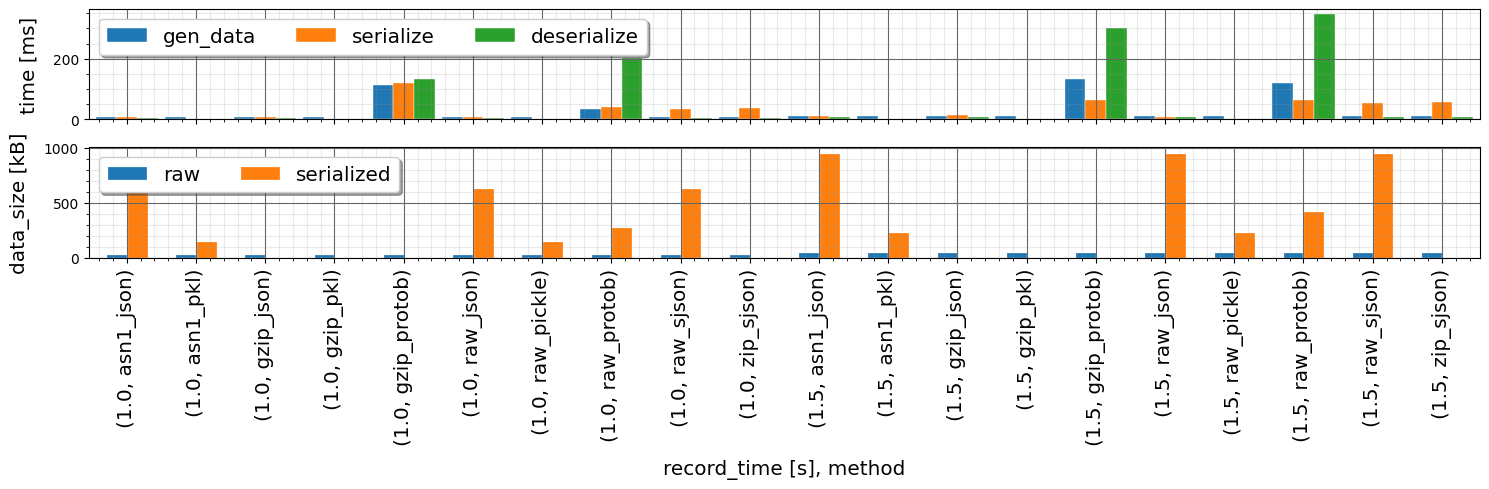

In [14]:
# plot data as bar
plot_serialization_data_as_bar(result.loc[1:2,:].sort_index(), save=save_plot, name='serialize_comp_bar', fig_size=(15, 5))

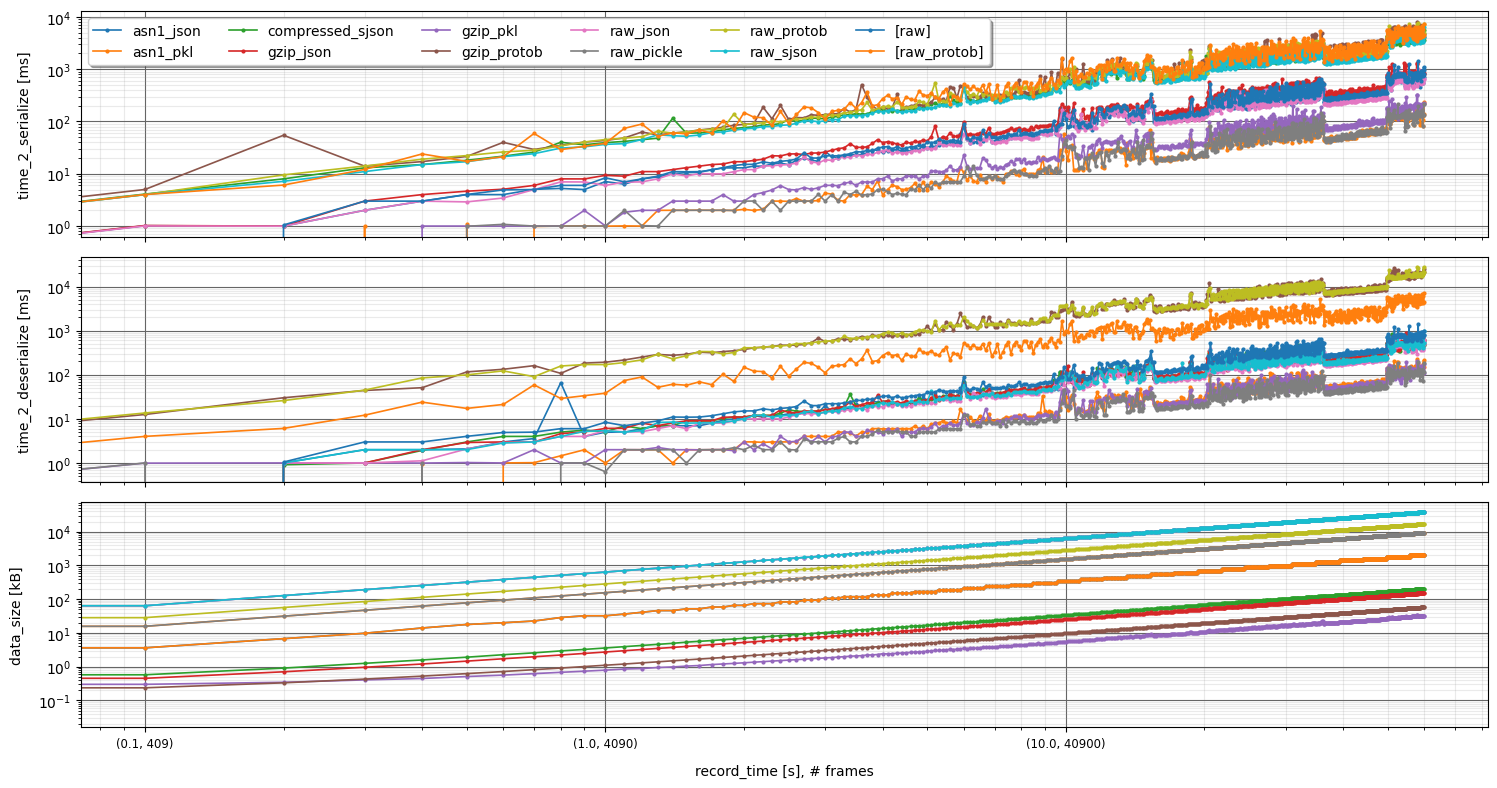

In [15]:
# import generated result
# test time from 0 to 60 s in 0.1 step_size
result2 = read_data('serialization/in_memory_result_0to60_in0.1_single_2022_09_12.parquet.gzip')

# plot hole data
plot_serialization_data_as_line(result2)

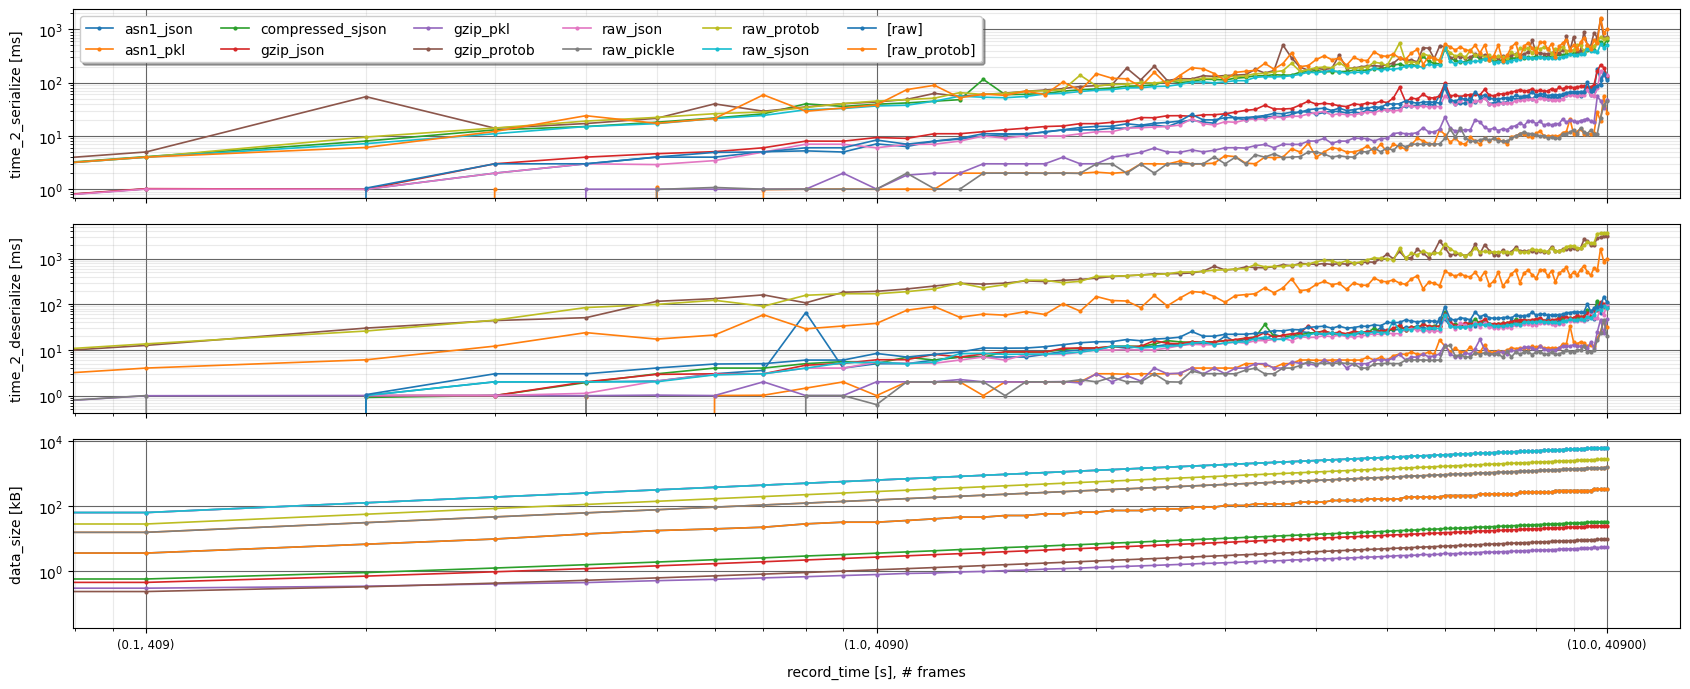

In [16]:
# plot only between time (0 sec - 10 sec
# save the fig to output-folder
plot_serialization_data_as_line(result2.loc[0.0:10, :], fig_size=(17, 7), logx=True, logy=True, name='serialize_comp')

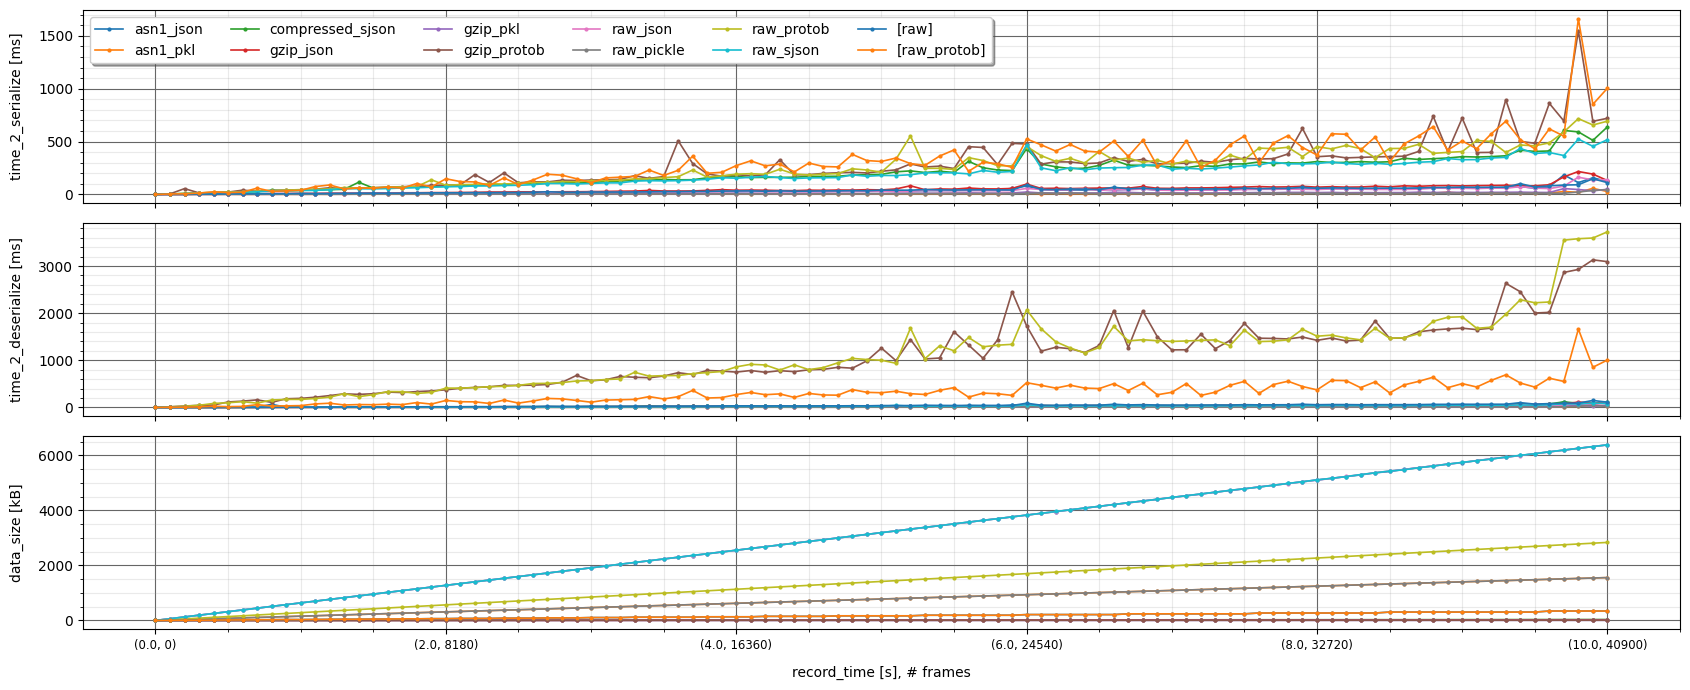

In [17]:
plot_serialization_data_as_line(result2.loc[0.0:10, :], fig_size=(17, 7), logy=False, logx=False, name='serialize_comp2')

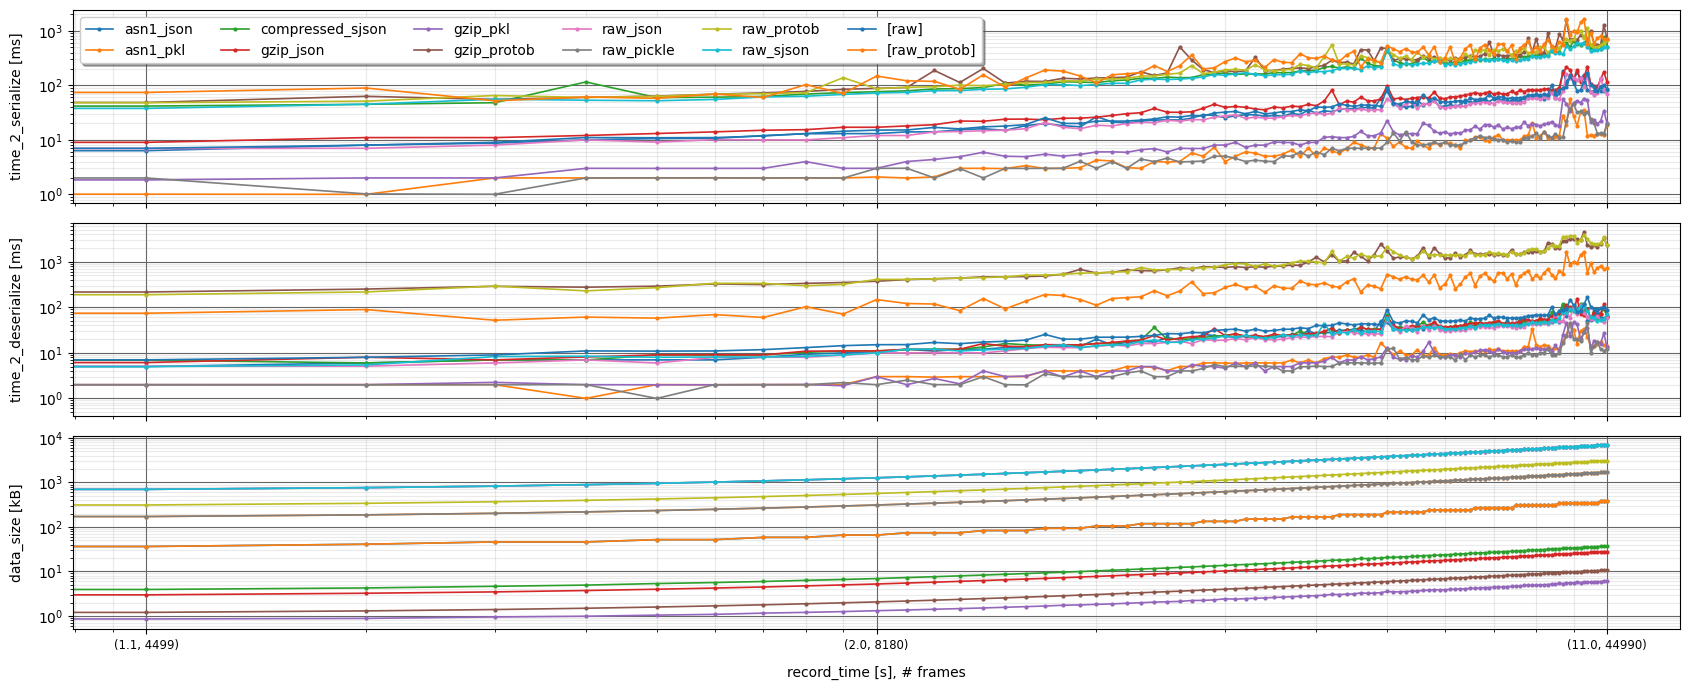

In [18]:
plot_serialization_data_as_line(result2.loc[1:11, :], fig_size=(17, 7), logy=True, logx=True, name='serialize_comp_all_line', save=save_plot)

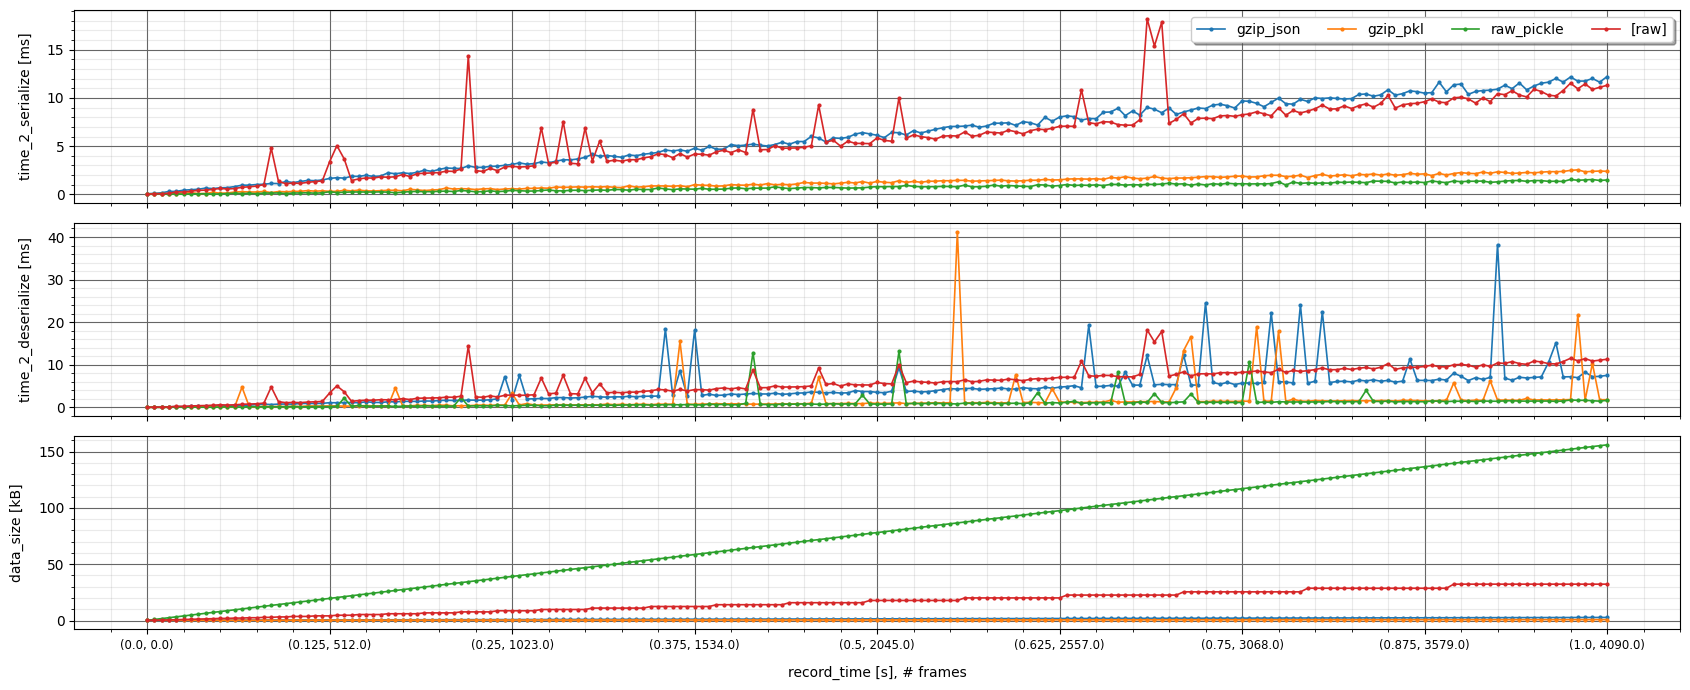

In [19]:
# import generated result
# test time from 0 to 10 s in 0.005 step_size
# filter bad methods and plot
ignore_list = ['raw_protob', 'gzip_protob', 'raw_json', 'raw_sjson', 'compressed_sjson', 'asn1_json', '[raw_protob]', 'asn1_pkl']
result3 = read_data('serialization/in_memory_result_0to1_in0.005_100times_2022_09_14.parquet.gzip')
plot_serialization_data_as_line(result3.loc[0.0:1, :], ignore_list=ignore_list, fig_size=(17, 7), logy=False, logx=False, name='serialize_comp_zoom')

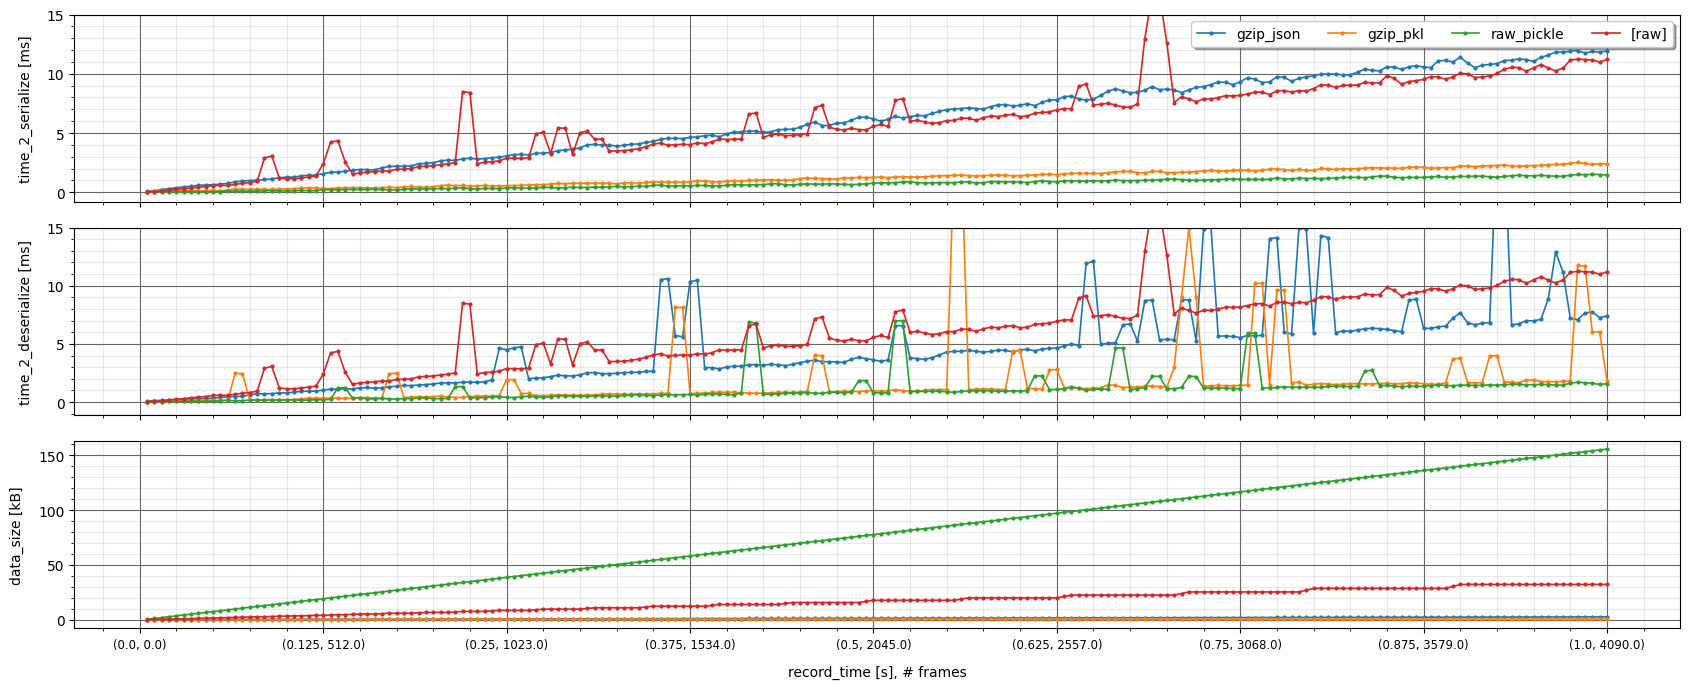

In [20]:
# cut off the y-axis
plot_serialization_data_as_line(result3.loc[0.0:1, :], ignore_list=ignore_list, fig_size=(17, 7), logy=False, logx=False, max_y_values=[15, 15, None],
                                name='serialize_comp_zoom', rolling=2)

In [21]:
time1, time2, data = split_df_for_single_plot(result3, ignore_list=ignore_list)
time1.loc[0.1]

method,gzip_json,gzip_pkl,raw_pickle,[raw]
#frames,,,,
409.0,1.227655,0.308378,0.141695,1.169364


In [22]:
time2.loc[0.1]

method,gzip_json,gzip_pkl,raw_pickle,[raw]
#frames,,,,
409.0,0.771673,0.236776,0.213304,1.169364


In [23]:
data.loc[0.5]

method,gzip_json,gzip_pkl,raw_pickle,[raw]
#frames,,,,
2045.0,1.466572,0.528564,78.042969,17.804688


In [24]:
x = data.loc[0.5:0.5, 'raw_pickle']
x

test_time [s]  #frames
0.5            2045.0     78.042969
Name: raw_pickle, dtype: float64

In [25]:
# datenmenge bei raw_pickle
# 78.0429
method_name = 'raw_pickle'
value = float(data.loc[0.5, method_name])
print (method_name)
print('datenmenge: {:10.2f} kbit bei 0.5 s'.format(value))
print('datenrate: {:12.2f} kbit/s'.format(value*8))
print('serialized/can: {:7.2f} %'.format((value*8/0.5)/290*100))
value = float(time1.loc[0.5, method_name]+time2.loc[0.5, method_name])
print('latenz: {:13.2f} ms'.format(value))

raw_pickle
datenmenge:      78.04 kbit bei 0.5 s
datenrate:       624.34 kbit/s
serialized/can:  430.58 %
latenz:          1.58 ms


In [26]:
x = data.loc[0.5, 'gzip_pkl']
x

#frames
2045.0    0.528564
Name: gzip_pkl, dtype: float64

In [27]:
# datenmenge bei gzip_pickle
# 78.0429
method_name = 'gzip_pkl'
value = float(data.loc[0.5, method_name])
print (method_name)
print('datenmenge: {:11.2f} kbit bei 0.5 s'.format(value*8))
print('datenrate: {:12.2f} kbit/s'.format(value*8/0.5))
print('serialized/can: {:7.2f} %'.format((value*8/0.5)/290*100))
value = float(time1.loc[0.5, method_name]+time2.loc[0.5, method_name])
print('latenz: {:15.2f} ms'.format(value))

gzip_pkl
datenmenge:        4.23 kbit bei 0.5 s
datenrate:         8.46 kbit/s
serialized/can:    2.92 %
latenz:            2.27 ms


In [28]:
data.index.levels[0]

Float64Index([  0.0, 0.005,  0.01, 0.015,  0.02, 0.025,  0.03, 0.035,  0.04,
              0.045,
              ...
               1.05, 1.055,  1.06, 1.065,  1.07, 1.075,  1.08, 1.085,  1.09,
              1.095],
             dtype='float64', name='test_time [s]', length=220)

In [29]:
# calc datenmenge for every method

time_ser, time_deser, data_size = split_df_for_single_plot(result3) #, ignore_list=ignore_list)
# data_rate = pd.DataFrame()
# data_rate.index = time_ser.index
data_rate = data_size.apply(lambda x: x*8/x.name[0], axis=1)
ratio_2_can = data_rate/290*100
latenz = time_ser + time_deser

# data_rate / data_size.index.to_series()
# data_rate = data_rate.div(data_size.index.levels[0])
# data_rate['can/serialized'] = data_size * 8 / data_size.index.levels[0] / 500 * 100
# data_rate['latenz'] = time_ser+time_deser
data_rate.join(ratio_2_can, lsuffix='_data_rate', rsuffix='_ratio2can')

,method,asn1_json_data_rate,asn1_pkl_data_rate,compressed_sjson_data_rate,gzip_json_data_rate,gzip_pkl_data_rate,gzip_protob_data_rate,raw_json_data_rate,raw_pickle_data_rate,raw_protob_data_rate,raw_sjson_data_rate,...,compressed_sjson_ratio2can,gzip_json_ratio2can,gzip_pkl_ratio2can,gzip_protob_ratio2can,raw_json_ratio2can,raw_pickle_ratio2can,raw_protob_ratio2can,raw_sjson_ratio2can,[raw]_ratio2can,[raw_protob]_ratio2can
test_time [s],#frames,,,,,,,,,,,,,,,,,,,,,
0.000,0.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
0.005,21.0,5300.203125,1517.187500,391.000000,323.281250,357.000000,201.562500,5291.859375,1510.937500,2381.250000,5292.500000,...,134.827586,111.476293,123.103448,69.504310,1824.779095,521.012931,821.120690,1825.000000,133.620690,133.620690
0.010,41.0,5144.460938,1367.968750,211.406250,174.046875,183.421875,110.156250,5143.929688,1364.843750,2300.000000,5144.343750,...,72.898707,60.016164,63.248922,37.984914,1773.768858,470.635776,793.103448,1773.911638,127.155172,127.155172
0.015,62.0,5178.463542,1338.541667,151.500000,123.750000,126.421875,80.208333,5175.171875,1336.458333,2309.895833,5175.593750,...,52.241379,42.672414,43.593750,27.658046,1784.542026,460.847701,796.515805,1784.687500,102.011494,102.011494
0.020,82.0,5131.781250,1308.593750,121.359375,98.652344,97.296875,61.988281,5130.710938,1307.031250,2287.109375,5128.265625,...,41.848060,34.018050,33.550647,21.375269,1769.210668,450.700431,788.658405,1768.367457,106.681034,106.681034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.075,4397.0,5103.826526,1247.543605,28.823837,21.759084,6.232122,8.735974,5104.408794,1247.507267,2269.040698,5104.842515,...,9.939254,7.503133,2.149008,3.012405,1760.140963,430.174920,782.427827,1760.290522,93.243785,93.243785
1.080,4418.0,5105.653935,1247.692419,28.806713,21.741319,6.231988,8.734230,5105.097584,1247.656250,2269.321470,5105.268880,...,9.933349,7.497007,2.148961,3.011804,1760.378477,430.226293,782.524645,1760.437545,92.812101,92.812101
1.085,4438.0,5105.588062,1247.559044,28.784274,21.735311,6.222422,8.721126,5104.861247,1247.523041,2269.088422,5104.642857,...,9.925612,7.494935,2.145663,3.007285,1760.296982,430.180359,782.444283,1760.221675,92.384395,92.384395


In [30]:
latenz

,method,asn1_json,asn1_pkl,compressed_sjson,gzip_json,gzip_pkl,gzip_protob,raw_json,raw_pickle,raw_protob,raw_sjson,[raw],[raw_protob]
test_time [s],#frames,,,,,,,,,,,,
0.000,0.0,0.032599,0.010195,0.030723,0.136068,0.070059,0.109935,0.020084,0.010095,0.039451,0.031686,0.000000,0.000000
0.005,21.0,0.129666,0.030026,0.377226,0.209520,0.126503,1.367254,0.125897,0.029364,1.324601,0.329258,0.142422,0.598750
0.010,41.0,0.269089,0.053065,0.656388,0.334668,0.111520,2.559454,0.220959,0.049529,2.480893,0.686290,0.123539,0.979762
0.015,62.0,0.372796,0.019882,0.906863,0.432732,0.108342,3.780997,0.290446,0.040693,3.638475,0.935564,0.240355,1.446905
0.020,82.0,0.443423,0.091150,1.382608,0.528679,0.169091,5.632493,0.360277,0.129950,5.009956,1.235583,0.509768,1.839261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.075,4397.0,15.972073,3.124852,65.803013,20.805016,4.801929,356.309125,16.888227,3.511994,339.215453,62.904322,24.025383,142.751942
1.080,4418.0,16.248848,3.133535,66.813438,20.298822,4.486177,372.588031,16.882324,3.391175,344.904635,62.879355,24.288077,209.394894
1.085,4438.0,16.365352,3.352950,68.486259,21.757724,4.624999,369.893613,17.575610,3.354468,346.802943,64.468656,24.713264,132.780972


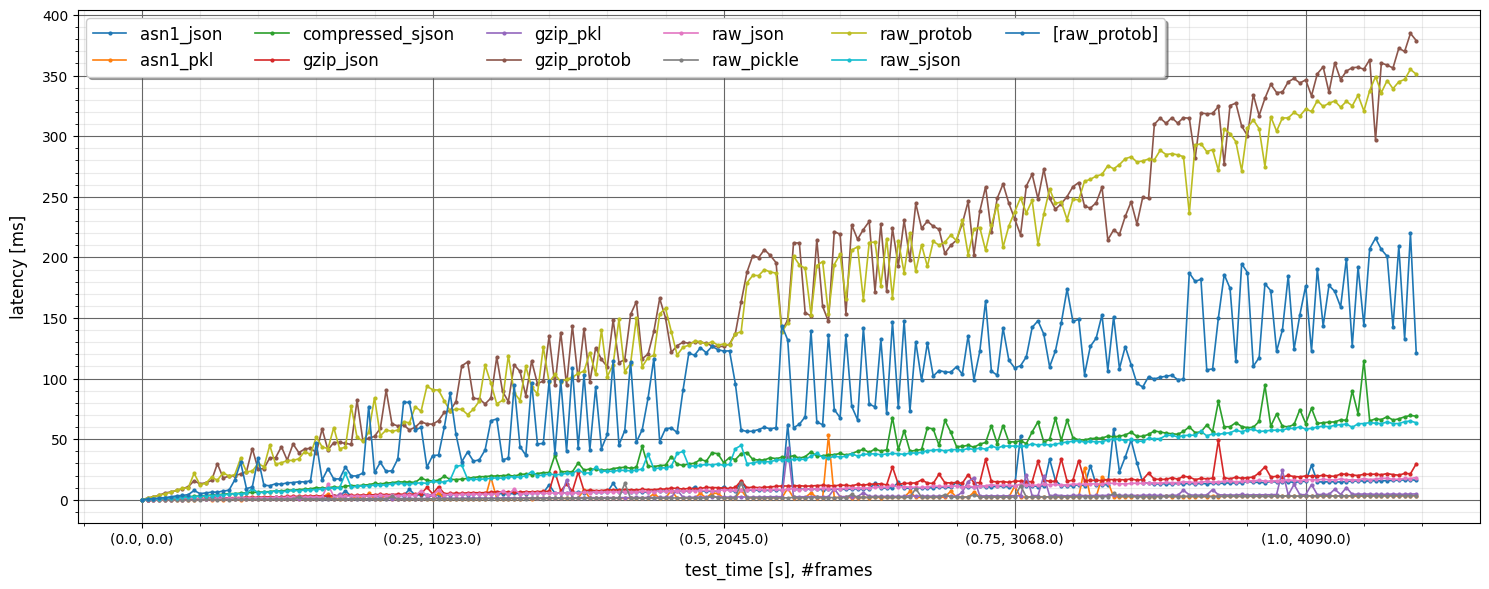

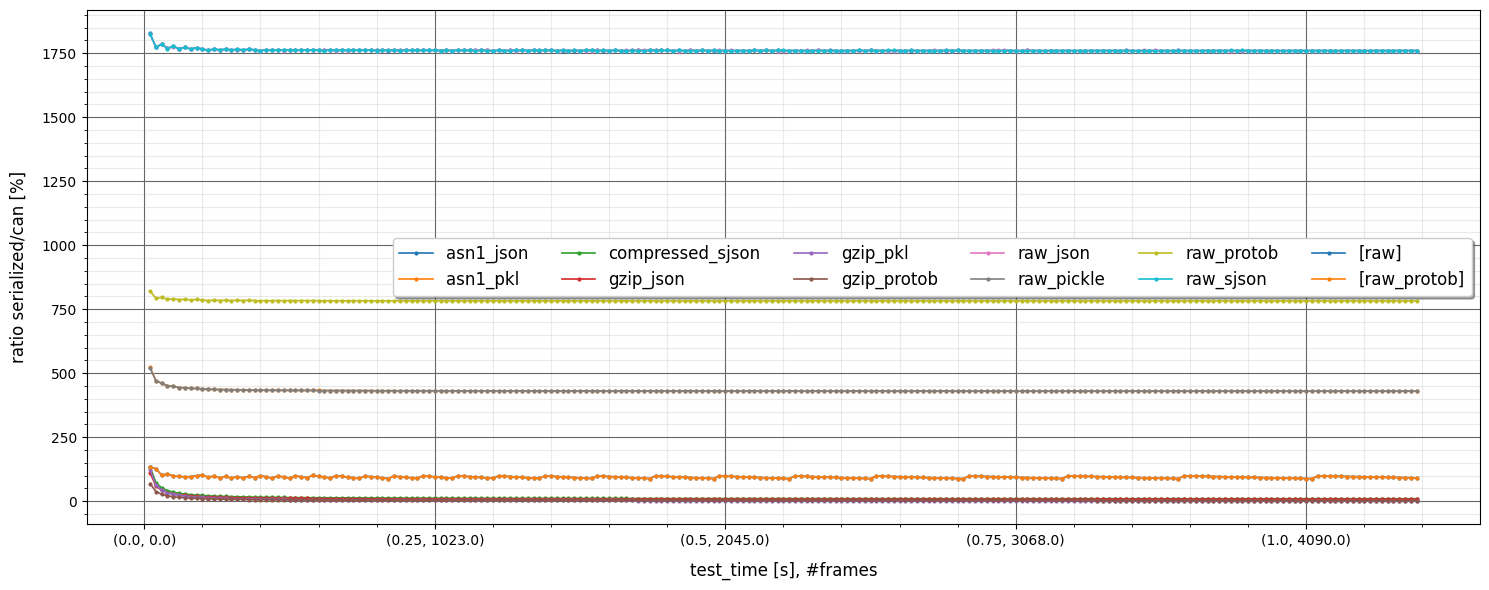

In [31]:
plot_dataframe([latenz.drop('[raw]', axis=1)], 'test_time [s], #frames', ['latency [ms]'], rolling=None, fig_size=(15, 6), )
plot_dataframe([ratio_2_can], 'test_time [s], #frames', ['ratio serialized/can [%]'], rolling=None, fig_size=(15, 6), log_x=False)

In [32]:
time_ser, time_deser, data_size = split_df_for_single_plot(result3, ignore_list=ignore_list)
# data_rate = pd.DataFrame()
# data_rate.index = time_ser.index
data_rate = data_size.apply(lambda x: x*8/x.name[0], axis=1)
ratio_2_can = data_rate/290*100
latenz = time_ser + time_deser

# data_rate / data_size.index.to_series()
# data_rate = data_rate.div(data_size.index.levels[0])
# data_rate['can/serialized'] = data_size * 8 / data_size.index.levels[0] / 500 * 100
# data_rate['latenz'] = time_ser+time_deser
data_rate.join(ratio_2_can, lsuffix='_data_rate', rsuffix='_ratio2can')

,method,gzip_json_data_rate,gzip_pkl_data_rate,raw_pickle_data_rate,[raw]_data_rate,gzip_json_ratio2can,gzip_pkl_ratio2can,raw_pickle_ratio2can,[raw]_ratio2can
test_time [s],#frames,,,,,,,,
0.000,0.0,inf,inf,inf,inf,inf,inf,inf,inf
0.005,21.0,323.281250,357.000000,1510.937500,387.500000,111.476293,123.103448,521.012931,133.620690
0.010,41.0,174.046875,183.421875,1364.843750,368.750000,60.016164,63.248922,470.635776,127.155172
0.015,62.0,123.750000,126.421875,1336.458333,295.833333,42.672414,43.593750,460.847701,102.011494
0.020,82.0,98.652344,97.296875,1307.031250,309.375000,34.018050,33.550647,450.700431,106.681034
...,...,...,...,...,...,...,...,...,...
1.075,4397.0,21.759084,6.232122,1247.507267,270.406977,7.503133,2.149008,430.174920,93.243785
1.080,4418.0,21.741319,6.231988,1247.656250,269.155093,7.497007,2.148961,430.226293,92.812101
1.085,4438.0,21.735311,6.222422,1247.523041,267.914747,7.494935,2.145663,430.180359,92.384395


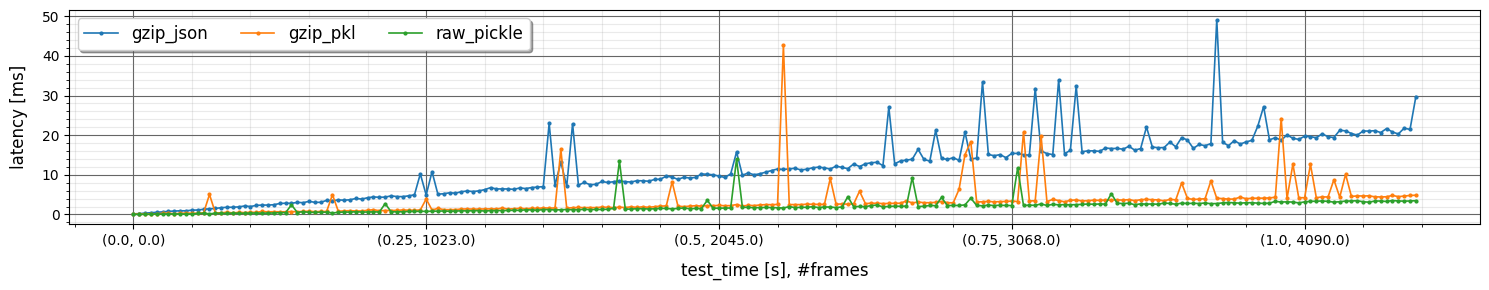

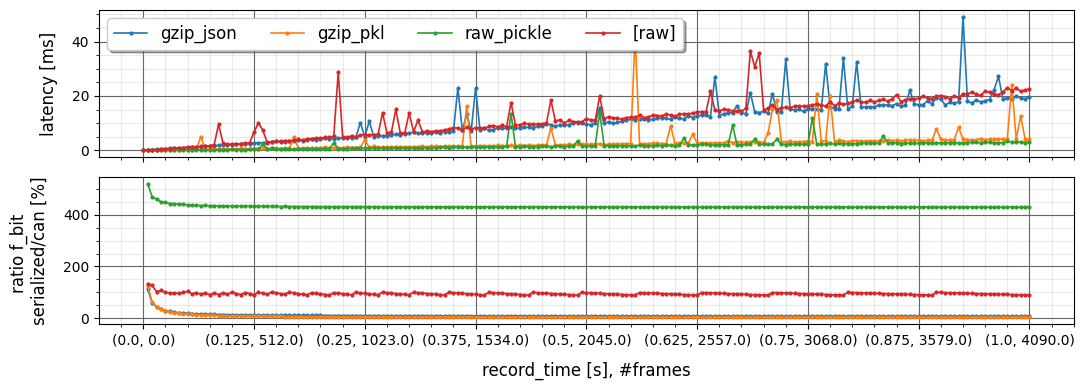

In [33]:
plot_dataframe(dfs=[latenz.drop('[raw]', axis=1)], x_label='test_time [s], #frames', y_labels=['latency [ms]'], rolling=None, fig_size=(15, 3), save=False, name='ser_latency')
plot_dataframe(dfs=[latenz.loc[0:1,:], ratio_2_can.loc[0:1,:]], x_label='record_time [s], #frames', y_labels=['latency [ms]', 'ratio f_bit \nserialized/can [%]'], rolling=None, fig_size=(11, 4), save=save_plot, name='ser_result')

In [34]:
data_rate.replace(np.inf, np.nan).dropna().mean()

method
gzip_json       28.867361
gzip_pkl        14.710484
raw_pickle    1253.377300
[raw]          274.492139
dtype: float64

In [35]:
ratio_2_can.replace(np.inf, np.nan).dropna().mean()

method
gzip_json       9.954262
gzip_pkl        5.072581
raw_pickle    432.199069
[raw]          94.652462
dtype: float64

In [36]:
latenz.median()

method
gzip_json     11.466354
gzip_pkl       2.528392
raw_pickle     1.792905
[raw]         12.878475
dtype: float64

In [37]:
x = np.arange(0, 1.1, 0.1).round(2)
latenz.loc[x, :]

,method,gzip_json,gzip_pkl,raw_pickle,[raw]
test_time [s],#frames,,,,
0.0,0.0,0.136068,0.070059,0.010095,0.000000
0.1,409.0,1.999328,0.545154,0.354998,2.338729
0.2,818.0,4.214301,1.021485,0.604305,4.523363
0.3,1227.0,6.261289,1.367831,0.852184,13.769784
0.4,1636.0,8.309801,1.855414,1.252444,8.676810
0.5,2045.0,9.679410,2.274103,1.578999,11.707792
0.6,2454.0,12.188799,2.566485,1.732900,12.557106
0.7,2864.0,14.313154,2.919879,2.264762,14.726372
0.8,3272.0,16.146073,3.576133,2.425010,17.752366


In [38]:
data_size.loc[x, :]

,method,gzip_json,gzip_pkl,raw_pickle,[raw]
test_time [s],#frames,,,,
0.0,0.0,0.053711,0.056641,0.037109,0.054688
0.1,409.0,0.452920,0.299043,15.721680,3.617188
0.2,818.0,0.706855,0.350752,31.298828,6.773438
0.3,1227.0,0.960918,0.408418,46.877930,9.773438
0.4,1636.0,1.214805,0.462090,62.455078,14.023438
0.5,2045.0,1.466572,0.528564,78.042969,17.804688
0.6,2454.0,1.723164,0.574297,93.620117,20.054688
0.7,2864.0,1.972129,0.628984,109.235352,22.585938
0.8,3272.0,2.227988,0.686143,124.776367,28.648438


method                 gzip_json  gzip_pkl  raw_pickle     [raw]  offset_json
test_time [s] #frames                                                        
0.000         0.0       0.136068  0.070059    0.010095  0.000000    -0.136068
0.005         21.0      0.209520  0.126503    0.029364  0.142422    -0.067098
0.010         41.0      0.334668  0.111520    0.049529  0.123539    -0.211129
0.015         62.0      0.432732  0.108342    0.040693  0.240355    -0.192378
0.020         82.0      0.528679  0.169091    0.129950  0.509768    -0.018911


<AxesSubplot:xlabel='test_time [s],#frames'>

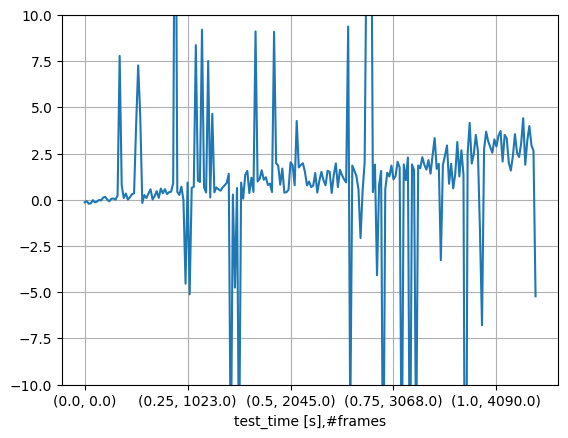

In [39]:
# latenz zwischen json und raw
latenz['offset_json'] = latenz['[raw]'] - latenz['gzip_json']
print(latenz.head())
latenz['offset_json'].plot(ylim=[-10, 10], grid=True)

test_time [s]  #frames
0.000          0.0        0.000000
0.005          21.0       0.679753
0.010          41.0       0.369139
0.015          62.0       0.555435
0.020          82.0       0.964229
dtype: float64
1.1125499708336526
1.1700869319925002


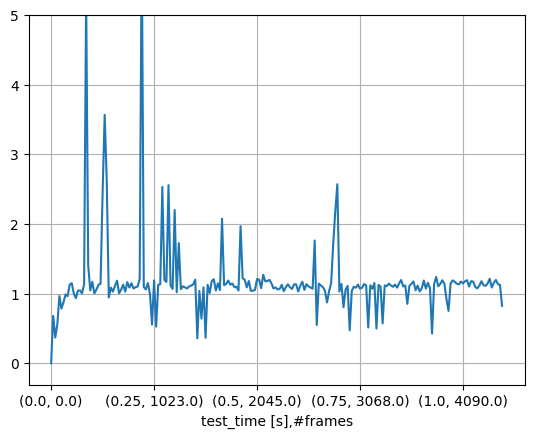

In [40]:
ratio = latenz['[raw]'] / latenz['gzip_json']
print(ratio.head())
ratio.plot(grid=True, ylim=[None, 5])
print(ratio.median())
print(ratio.mean())

method                 gzip_json  gzip_pkl  raw_pickle     [raw]  offset_json  \
test_time [s] #frames                                                           
0.000         0.0       0.136068  0.070059    0.010095  0.000000    -0.136068   
0.005         21.0      0.209520  0.126503    0.029364  0.142422    -0.067098   
0.010         41.0      0.334668  0.111520    0.049529  0.123539    -0.211129   
0.015         62.0      0.432732  0.108342    0.040693  0.240355    -0.192378   
0.020         82.0      0.528679  0.169091    0.129950  0.509768    -0.018911   

method                 offset_pkl  
test_time [s] #frames              
0.000         0.0        0.059965  
0.005         21.0       0.097139  
0.010         41.0       0.061991  
0.015         62.0       0.067649  
0.020         82.0       0.039141  


<AxesSubplot:xlabel='test_time [s],#frames'>

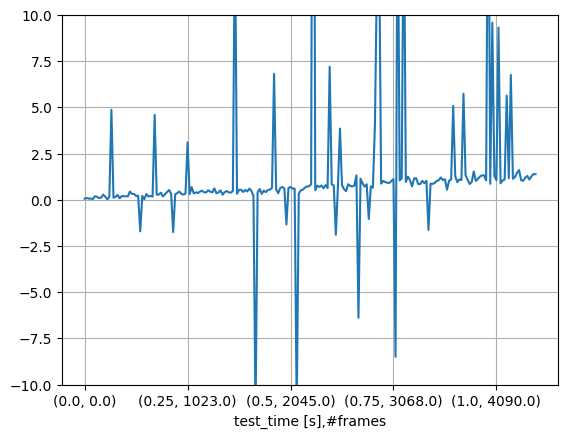

In [41]:
# latenz zwischen pkl und gzip pkl
latenz['offset_pkl'] = latenz['gzip_pkl'] - latenz['raw_pickle']
print(latenz.head())
latenz['offset_pkl'].plot(ylim=[-10, 10], grid=True)

In [42]:
latenz['offset_pkl'].loc[1,:]

#frames
4090.0    1.059301
Name: offset_pkl, dtype: float64

test_time [s]  #frames
0.000          0.0        6.940246
0.005          21.0       4.308136
0.010          41.0       2.251613
0.015          62.0       2.662409
0.020          82.0       1.301202
dtype: float64
1.414747699056643
2.066456679476448


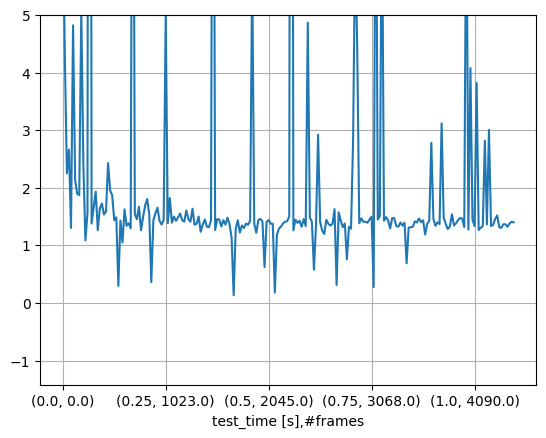

In [43]:
ratio = latenz['gzip_pkl'] / latenz['raw_pickle']
print(ratio.head())
ratio.plot(grid=True, ylim=[None, 5])
print(ratio.median())
print(ratio.mean())

test_time [s]  #frames
0.000          0.0              NaN
0.005          21.0        4.232318
0.010          41.0        7.441009
0.015          62.0       10.571417
0.020          82.0       13.433435
dtype: float64
155.06499920625123
140.82479514228876


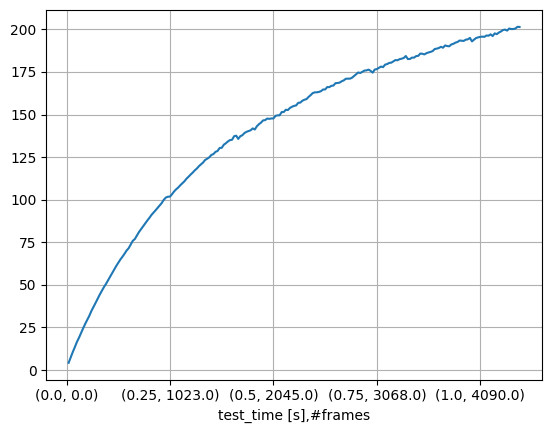

In [44]:
ratio = data_rate['raw_pickle'] / data_rate['gzip_pkl']
print(ratio.head())
ratio.plot(grid=True, ylim=[None, None])
print(ratio.median())
print(ratio.mean())

test_time [s]  #frames
0.000          0.0              NaN
0.005          21.0        4.232318
0.010          41.0        7.441009
0.015          62.0       10.571417
0.020          82.0       13.433435
dtype: float64
155.0649992062512
140.82479514228876


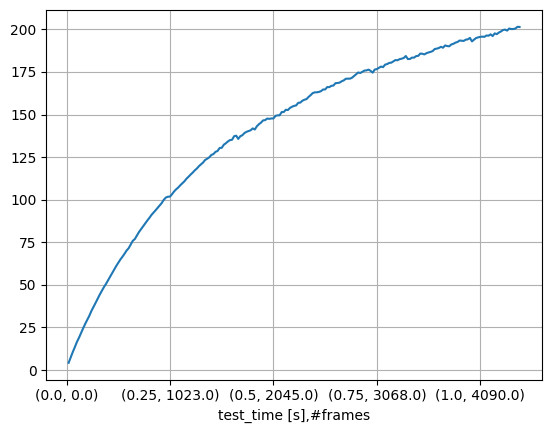

In [45]:
ratio = ratio_2_can['raw_pickle'] / ratio_2_can['gzip_pkl']
print(ratio.head())
ratio.plot(grid=True, ylim=[None, None])
print(ratio.median())
print(ratio.mean())

In [46]:
ratio_2_can.loc[x,:]

,method,gzip_json,gzip_pkl,raw_pickle,[raw]
test_time [s],#frames,,,,
0.0,0.0,inf,inf,inf,inf
0.1,409.0,12.494343,8.249461,433.701509,99.784483
0.2,818.0,9.749731,4.837958,431.707974,93.426724
0.3,1227.0,8.836027,3.755568,431.061422,89.870690
0.4,1636.0,8.377963,3.186827,430.724677,96.713362
0.5,2045.0,8.091433,2.916218,430.581897,98.232759
0.6,2454.0,7.922593,2.640445,430.437320,92.205460
0.7,2864.0,7.771937,2.478756,430.484144,89.008621
0.8,3272.0,7.682718,2.366009,430.263335,98.787716
